# Project 2

In this project, you will implement the exploratory analysis plan developed in Project 1. This will lay the groundwork for our our first modeling exercise in Project 3.

### Step 1: Load the python libraries you will need for this project 

In [3]:
#imports
from __future__ import division
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
import pylab as pl
import numpy as np
%matplotlib inline

### Step 2: Read in your data set 

In [15]:
#Read in data from source 
df_raw = pd.read_csv("../assets/admissions.csv")
print df_raw.head()

   admit    gre   gpa  prestige
0      0  380.0  3.61       3.0
1      1  660.0  3.67       3.0
2      1  800.0  4.00       1.0
3      1  640.0  3.19       4.0
4      0  520.0  2.93       4.0


## Questions
#### Question 1. How many observations are in our dataset? 


In [5]:
df_raw.count()

admit       400
gre         398
gpa         398
prestige    399
dtype: int64

Answer: 400

#### Question 2. Create a summary table

In [30]:
df_raw.describe()

,admit,gre,gpa,prestige
count,400.000000,398.000000,398.00000,399.000000
mean,0.317500,588.040201,3.39093,2.486216
std,0.466087,115.628513,0.38063,0.945333
min,0.000000,220.000000,2.26000,1.000000
25%,0.000000,520.000000,3.13000,2.000000
50%,0.000000,580.000000,3.39500,2.000000
75%,1.000000,660.000000,3.67000,3.000000
max,1.000000,800.000000,4.00000,4.000000


#### Question 3. Why would GRE have a larger STD than GPA?

Answer: The scales for the 2 predictors are different.

#### Question 4. Drop data points with missing data


In [31]:
df = df_raw.dropna()

#### Question 5. Confirm that you dropped the correct data. How can you tell? 

In [32]:
df.isnull().values.any()

False

Answer: By using df.isnull().values.any() which returned false confirming no null/na values are in df.

#### Question 6. Create box plots for GRE and GPA

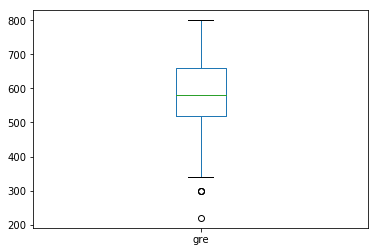

In [38]:
df['gre'].plot(kind='box')
plt.show()

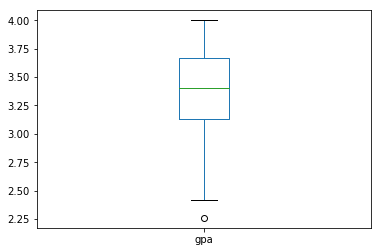

In [39]:
df['gpa'].plot(kind='box')
plt.show()

#### Question 7. What do this plots show?

Answer: 

#### Question 8. Describe each distribution 

In [ ]:
# plot the distribution of each variable 


#### Question 9.  If our model had an assumption of a normal distribution would we meet that requirement? 

Answer: 

#### Question 10.  Does this distribution need correction? If so, why? How? 

Answer: 

#### Question 11. Which of our variables are potentially colinear? 

In [ ]:
# create a correlation matrix for the data


#### Question 12. What did you find?

Answer: 

#### Question 13. Write an analysis plan for exploring the association between grad school admissions rates and prestige of  undergraduate schools.

Answer: 

#### Question 14. What is your hypothesis? 

Answer: 

## Bonus/Advanced

#### 1. Bonus: Explore alternatives to dropping obervations with missing data

#### 2. Bonus: Log transform the skewed data

#### 3. Advanced: Impute missing data